# Deep Learning - Project 2
**Nina Żukowska 148278**
**Antoni Solarski 148270**

In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from utils import *

# PART 2

---
#### 1) The impact of the size of the training set on the results

In [2]:
random.seed(23)

# download and preprocess data
download_data_if_not_exists()
N_CLASSES = 15
CLASSES, _ = choose_biggest_classes(DATA_DIR, N_CLASSES)
# set number of samples in each class to 30
MIN_SAMPLE = 30
IMAGES, LABELS = load_data(DATA_DIR, CLASSES, MIN_SAMPLE)
X, MEAN, STD = standardize_images(resize_images(IMAGES))
y, labels_enc, labels_ohe = one_hot_encoding_for_labels(LABELS)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((315, 200, 300, 3), (135, 200, 300, 3), (315, 15), (135, 15))

In [3]:
# get "part 1" model
model = get_model(N_CLASSES)

In [4]:
# train model
history = train_model(model, X_train, y_train, X_test, y_test, 2, 32) # TODO: increase epochs for learning

Epoch 1/2
10/10 [==============================] - 16s 2s/step - loss: 3.1464 - accuracy: 0.0667 - val_loss: 2.7021 - val_accuracy: 0.0889
Epoch 2/2
10/10 [==============================] - 15s 2s/step - loss: 2.7058 - accuracy: 0.0889 - val_loss: 2.7016 - val_accuracy: 0.0815


In [5]:
# evaluate model
MODEL_EVAL = model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 210ms/step - loss: 2.7016 - accuracy: 0.0815


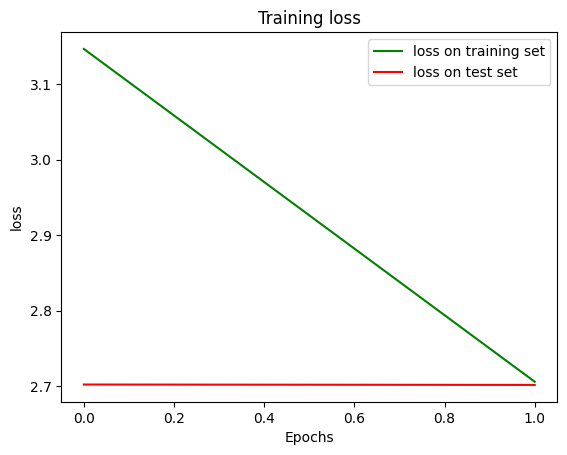

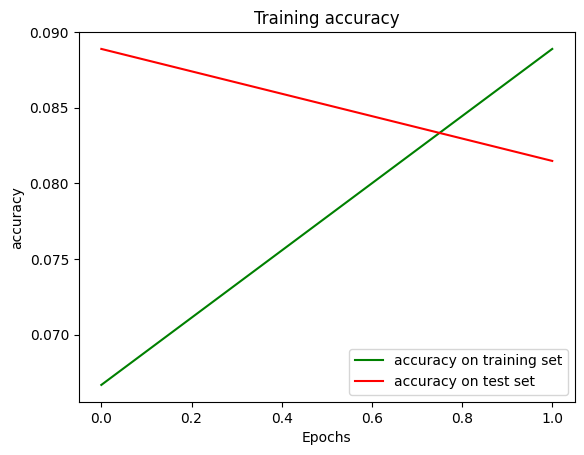

In [6]:
# plot training metrics
plot_metrics_from_model_history(history, 'loss')
plot_metrics_from_model_history(history, 'accuracy')

In [7]:
# save model
save_model(model, f"small_dataset_{int(MODEL_EVAL[1] * 100)}")

INFO:tensorflow:Assets written to: models/small_dataset_8-2023-01-19\assets


INFO:tensorflow:Assets written to: models/small_dataset_8-2023-01-19\assets


'models/small_dataset_8-2023-01-19'

In [8]:
# get predictions
y_test_raw_predictions = model.predict(X_test)

y_test_predictions = convert_predictions(y_test_raw_predictions)
y_test_predictions_labels = get_labels(y_test_predictions, labels_enc)

y_test_true = labels_ohe.inverse_transform(y_test).reshape((1, -1))[0]
y_test_true_labels = get_labels(y_test_true, labels_enc)

5/5 [==============================] - 1s 199ms/step


In [9]:
# create classification report
print(classification_report(y_test_true_labels, y_test_predictions_labels, zero_division=0))

              precision    recall  f1-score   support

       Faces       0.00      0.00      0.00         9
    Leopards       0.00      0.00      0.00         9
  Motorbikes       0.00      0.00      0.00         9
   airplanes       0.18      0.22      0.20         9
      bonsai       0.07      0.78      0.13         9
       brain       0.00      0.00      0.00         9
   butterfly       0.00      0.00      0.00         9
    car_side       0.00      0.00      0.00         9
  chandelier       0.00      0.00      0.00         9
 grand_piano       0.00      0.00      0.00         9
   hawksbill       0.33      0.22      0.27         9
  helicopter       0.00      0.00      0.00         9
       ketch       0.00      0.00      0.00         9
     menorah       0.00      0.00      0.00         9
       watch       0.00      0.00      0.00         9

    accuracy                           0.08       135
   macro avg       0.04      0.08      0.04       135
weighted avg       0.04   

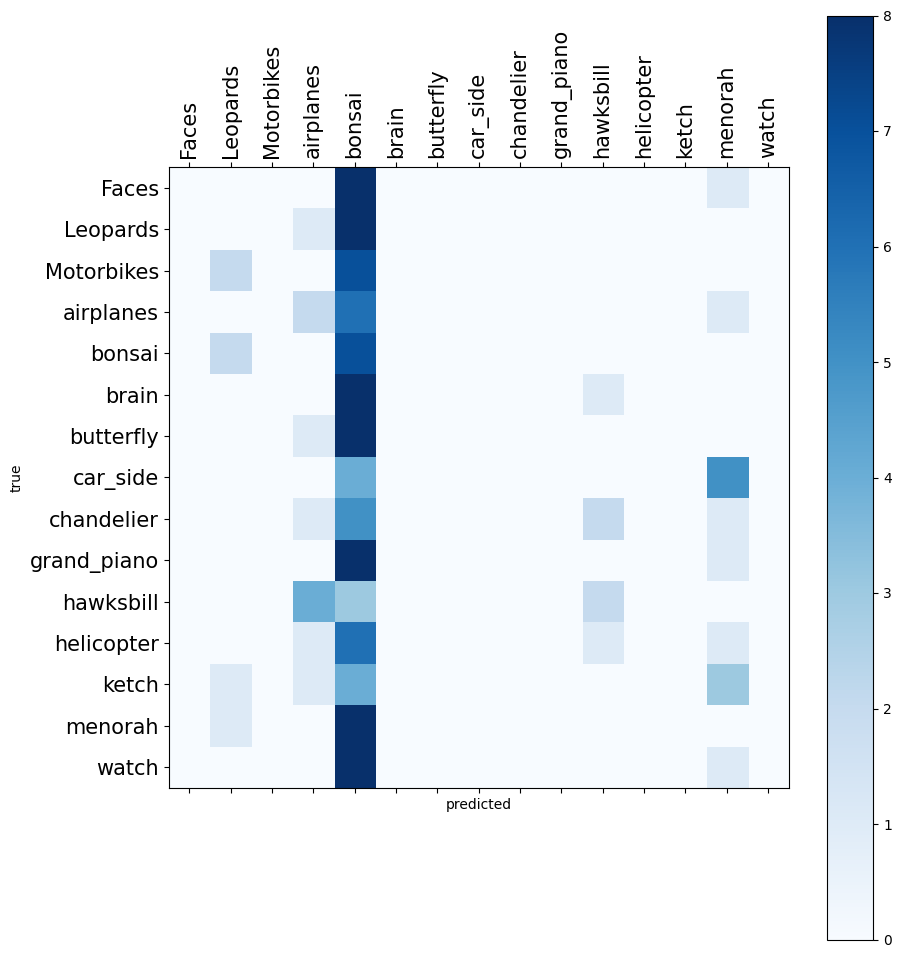

In [10]:
# create confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_true, y_test_predictions)
plot_confusion_matrix(confusion_matrix, labels_enc.inverse_transform([i for i in range(N_CLASSES)]))

##### Results discussion

In [7]:
# TODO